In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 행(row) 다 보기
pd.set_option('display.max_rows', None)

# 열(column) 다 보기
pd.set_option('display.max_columns', None)

In [2]:
from PublicDataReader import Ecos
service_key = "2G5XUDEN750MGRZM37GF"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None


### 물가지수(2020=100)

1️⃣ 기본 정의 복습
- 소비자물가지수(CPI): 최종 소비자가 구매하는 상품·서비스 가격의 변화
- 물가지수(PPI): 생산자가 판매하는 상품·서비스 가격의 변화 (공장, 도매 단계)
- 즉, PPI는 가격 변화의 선행 지표가 될 수 있고, CPI는 최종 소비자 체감을 보여줌.



2️⃣ 패턴이 동일하게 간다는 의미
- PPI와 CPI가 같은 방향, 비슷한 비율로 움직임 → 원자재·중간재 가격 변동이 소비자 가격으로 거의 그대로 전달된다는 뜻
- 기업이 체감하는 비용 상승이 소비자 가격에 바로 반영되는 구조
- 석유 가격 상승 → 생산자 원가 상승 → 휘발유·전기요금 등 소비자 가격 상승



3️⃣ 해석 포인트
- 원재료 가격이 소비자 가격에 빠르게 전이됨
    + 비용 흡수 없이 가격에 전가할 수 있음
	+ 마진이 일정하거나 낮은 산업에서는 자연스러운 현상
- 통화정책 영향
	+ 중앙은행 입장에서는 CPI가 PPI 패턴을 따라가는 걸 확인하면 물가 전이(pass-through) 정도를 판단 가능
- 동일 패턴의 한계
	+ 항상 1:1 비율로 반영되는 건 아님
	+ 서비스 업종, 임금 비중 높은 업종은 PPI 상승이 CPI에 늦게 또는 일부만 반영됨


4️⃣ 요약
- PPI와 CPI가 동일 패턴 → 원재료 가격 상승/하락이 소비자 가격에 거의 그대로 전달되고 있음
- 의미: 인플레이션 압력이 이미 생산 단계에서 소비자 단계로 전이 중
- 장기적으로 PPI가 CPI보다 먼저 움직이는 경우가 많음 → 선행 지표 역할


## 소비자물가지수

In [3]:
df_cus_price = api.get_statistic_search(통계표코드="901Y010", 주기="M", 검색시작일자="202011", 검색종료일자="202510")
df_pp_price = api.get_statistic_search(통계표코드="404Y014", 주기="M", 검색시작일자="202011", 검색종료일자="202510")

df_cus_price['값'] = df_cus_price['값'].astype(float)
df_pp_price['값'] = df_pp_price['값'].astype(float)

df_cus_price.head()

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,통계항목명2,통계항목코드3,통계항목명3,통계항목코드4,통계항목명4,단위,WGT,시점,값
0,901Y010,4.2.2. 소비자물가지수(특수분류),00,총지수,None,None,None,None,None,None,2020=100,1000,202011,100.09
1,901Y010,4.2.2. 소비자물가지수(특수분류),10,신선식품 1),None,None,None,None,None,None,2020=100,37.9,202011,99.95
2,901Y010,4.2.2. 소비자물가지수(특수분류),11,신선어개,None,None,None,None,None,None,2020=100,9.3,202011,101.56
3,901Y010,4.2.2. 소비자물가지수(특수분류),110,생활물가지수 4),None,None,None,None,None,None,2020=100,528.4,202011,99.87
4,901Y010,4.2.2. 소비자물가지수(특수분류),12,신선채소,None,None,None,None,None,None,2020=100,14.2,202011,98.91


- PPI(생산자물가지수) 급등 후 완만한 증가
    + 원자재, 중간재 가격 충격 → 코로나 이후 공급망 차질, 원자재 가격 상승
    + 2022년 이후 PPI 상승폭 완만 → 가격 충격이 어느 정도 해소되거나, 기업들이 가격 상승분을 소비자 가격으로 일부 전가함

- 즉, 초기 급등은 공급측 요인, 완만한 증가는 구조적 상승과 인플레이션 안정화의 혼합 신호

- CPI(소비자물가지수)와 근원물가(Core CPI) 선형 증가
    + CPI와 근원물가가 완만한 선형 증가 → 소비자 물가는 기업 비용 증가를 일정 부분 반영하되, 급격한 변동은 없음
    + 근원물가 선형 증가 → 변동성이 큰 농산물·석유류 제외, 기조적인 인플레이션을 보여줌

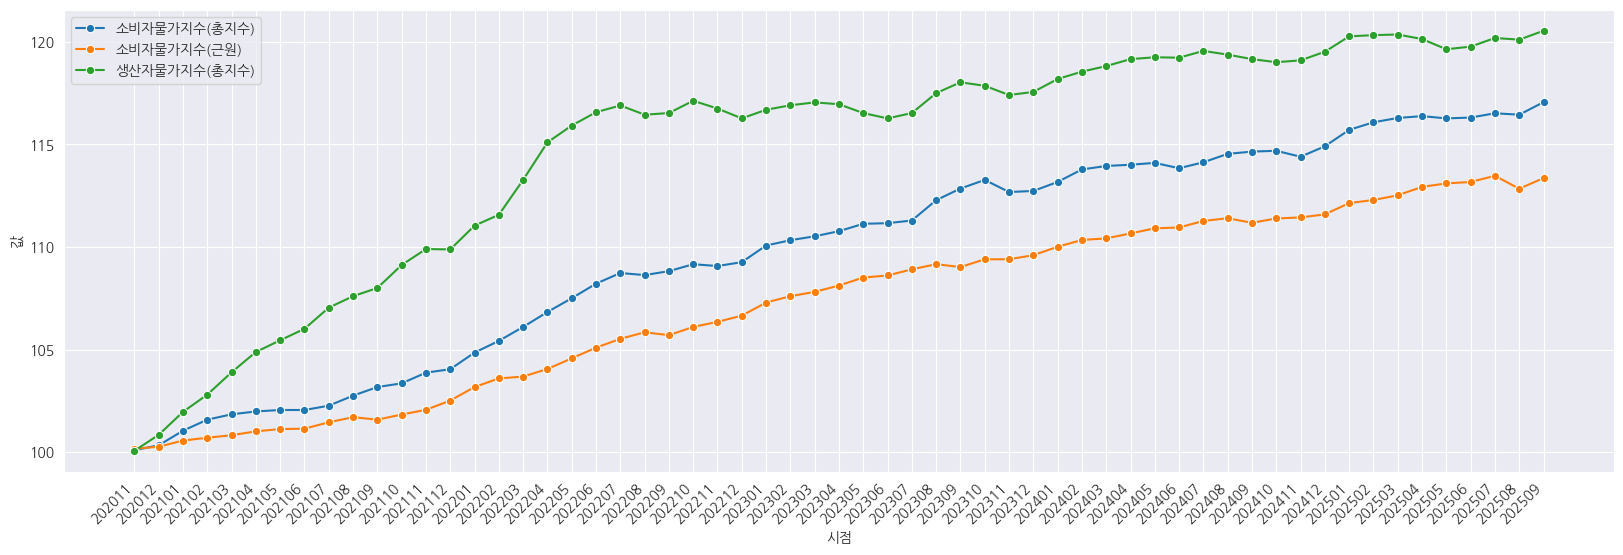

In [4]:
df_cus_tmp = df_cus_price[df_cus_price['통계항목명1'] == '총지수' ]
df_cus_orig_tmp = df_cus_price[df_cus_price['통계항목명1'] == '식료품 및 에너지제외 지수 3)' ]
df_pp_tmp = df_pp_price[df_pp_price['통계항목명1'] == '총지수' ]

plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x="시점", y="값", data=df_cus_tmp, label='소비자물가지수(총지수)', marker='o')
sns.lineplot(x="시점", y="값", data=df_cus_orig_tmp, label='소비자물가지수(근원)', marker='o')
sns.lineplot(x="시점", y="값", data=df_pp_tmp, label='생산자물가지수(총지수)', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [5]:
df_cus_price['통계항목코드1_길이'] = df_cus_price['통계항목코드1'].apply(lambda x: len(x))
df_pp_price['통계항목코드1_길이'] = df_pp_price['통계항목코드1'].apply(lambda x: len(x))

df_cus1 = df_cus_price[(df_cus_price['통계항목명1'] != '총지수')]
df_pp1 = df_pp_price[(df_pp_price['통계항목코드1_길이'] == 3) & (df_pp_price['통계항목명1'] != '총지수')]

- 신선과실 가격 급등 = 공급 제한 + 운송/물류 비용 상승 + 수요 증가
- 단기적 충격이므로 근원물가에는 반영되지 않음
- 장기적으로는 생산량 안정, 수입 증가, 계절적 요인으로 정상화 가능

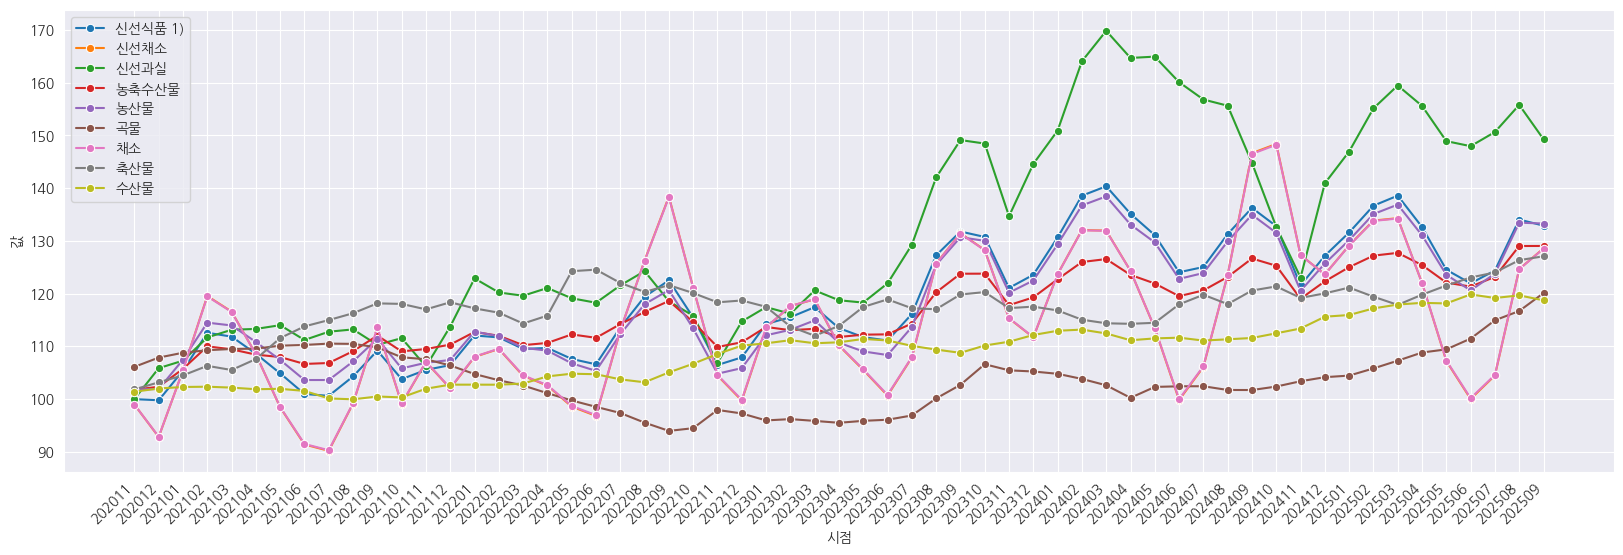

In [6]:
plt.figure(figsize=(20,6))  # 그림 넓게
list_cols = ['신선채소', '신선과실', '신선식품 1)', '농축수산물', '농산물', '곡물', '채소', '축산물', '수산물']
sns.lineplot(x="시점", y="값", data=df_cus1[df_cus1['통계항목명1'].isin(list_cols)], hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

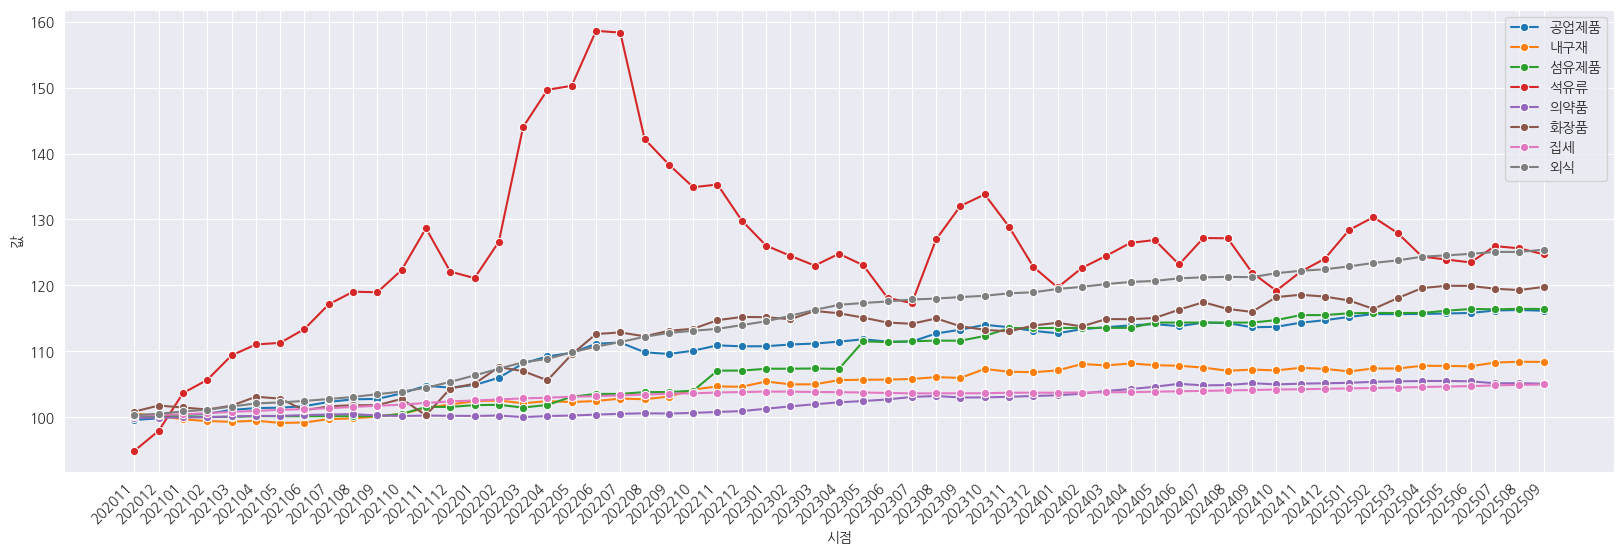

In [7]:
df_cus_price.head()
plt.figure(figsize=(20, 6))  # 그림 넓게
list_cols = ['공업제품', '내구재', '섬유제품', '석유류', '의약품', '화장품', '집세', '외식']
sns.lineplot(x="시점", y="값", data=df_cus1[df_cus1['통계항목명1'].isin(list_cols)], hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

## 생산자물가지수

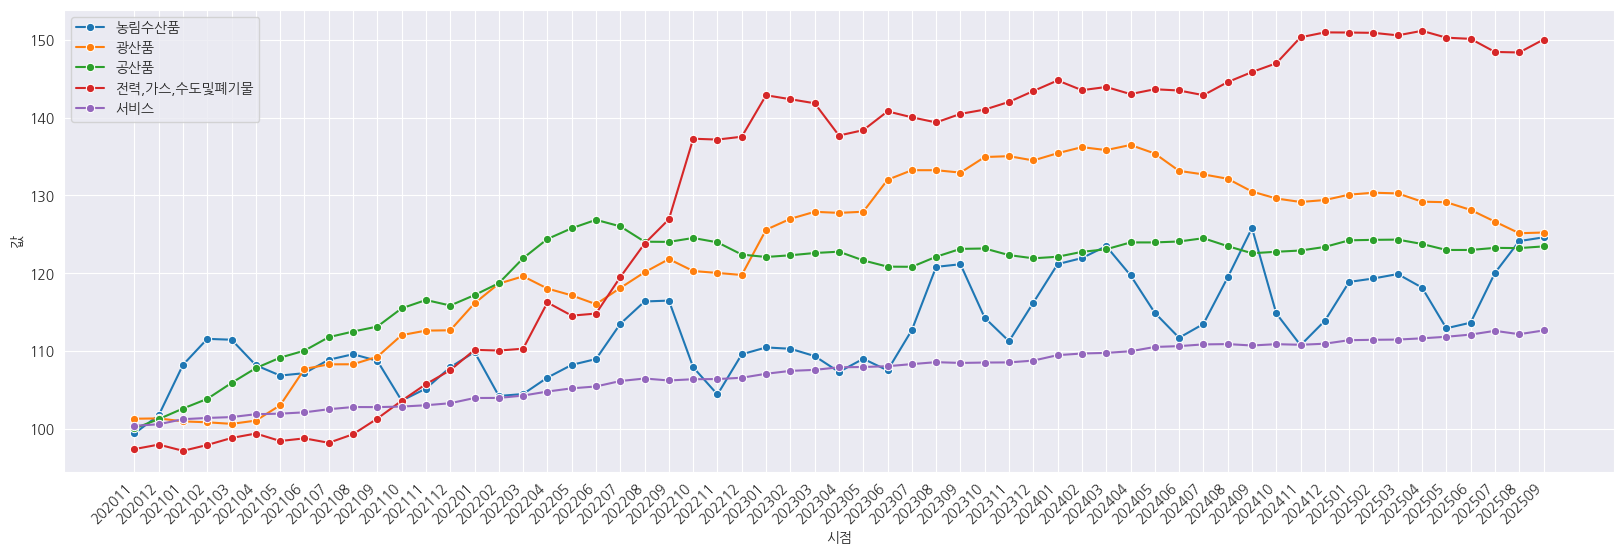

In [8]:
plt.figure(figsize=(20,6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp1, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


+ 도시가스 : 가정, 산업, 상업용 도시가스 공급 가격 변동
+ 전력 : 발전소에서 생산되어 공급되는 전기 요금에 해당하는 생산자 가격
+ 증기 및 온수 공급 : 공공·산업용 난방·온수 제공 서비스 가격 변화 (주로 산업단지, 대형 건물 등)
+ 원자재·연료 가격 충격 + 공급망 문제 + 수요 변화가 결합


- 전력,가스,수도물및폐기물
  + 전력
    + 전력 물가 상승 = 단순한 요금 인상이 아니라
    + “에너지 수입비용 증가 + 환율 영향 + 정책적 원가반영”의 결과이며,
    + 경제 전반에 비용 인플레이션 압력을 가하는 신호예요.
    + 전력 생산의 약 70%가 여전히 화석연료 (LNG·석탄 등)
  + LNG
    + 3대 핵심 공급원: 카타르, 미국, 호주
    + 한국은 전량 수입국이에요. (자급률 거의 0%), 환율 상승 → LNG 수입비 증가 → 전력요금 인상 압력

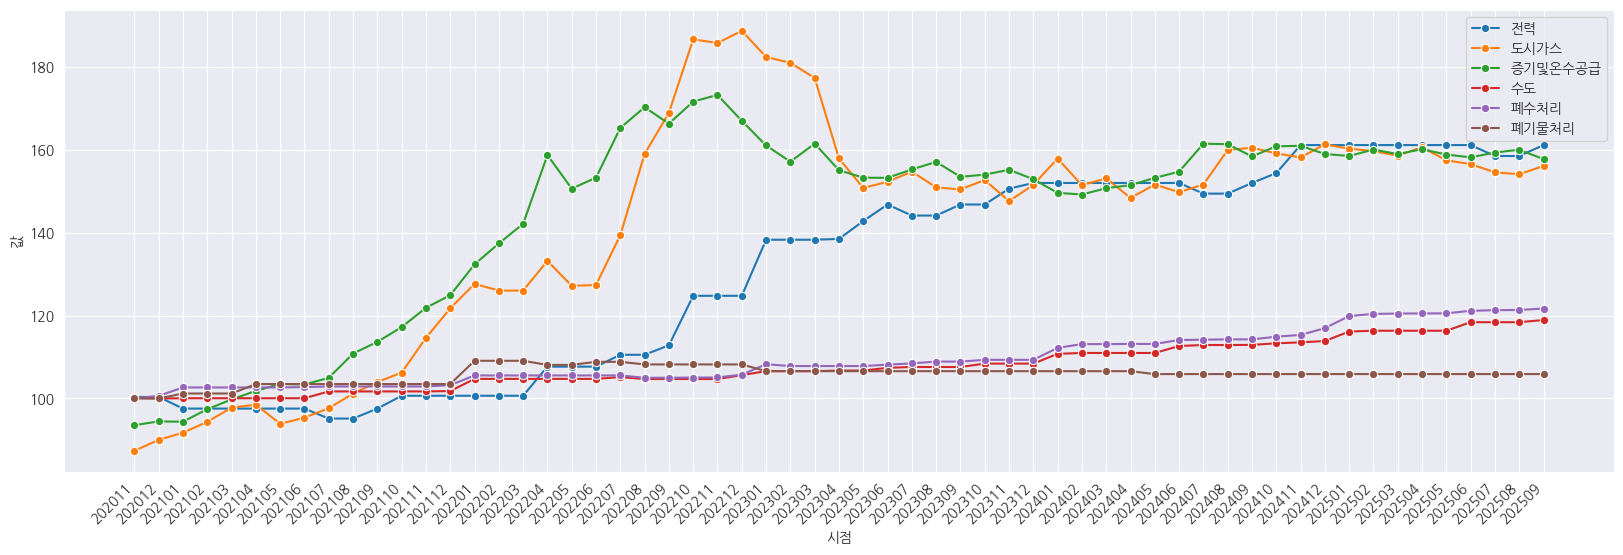

In [9]:
df_pp5 = df_pp_price[(df_pp_price['통계항목코드1'].str.startswith('4')) & (df_pp_price['통계항목코드1'].str.endswith('AA')) & (df_pp_price['통계항목코드1_길이'] == 7)]


plt.figure(figsize=(20,6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp5, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


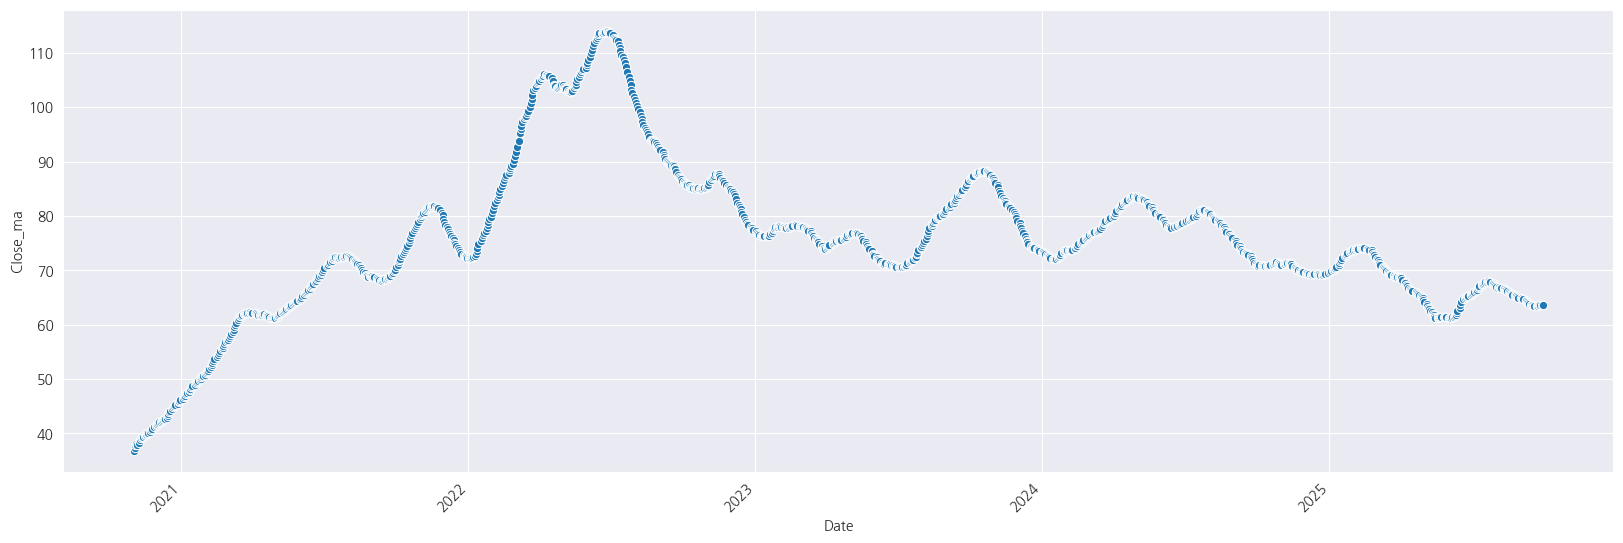

In [10]:
import yfinance as yf

# WTI 원유 선물 티커
df_oil = yf.download("CL=F", start="2020-11-01", end="2025-10-01", auto_adjust=True)
df_oil = df_oil.dropna()
df_oil.columns = ['_'.join(col).strip() for col in df_oil.columns.values]
df_oil['Close_ma'] = df_oil['Close_CL=F'].rolling(window=30, min_periods=1).mean()


plt.figure(figsize=(20,6))  # 그림 넓게
sns.lineplot(x=df_oil.index, y=df_oil['Close_ma'],  marker='o')
# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

plt.show()

- 광산품
  + 일본 오염수로 인해, 그리고 공급부족으로 가격이 올라감

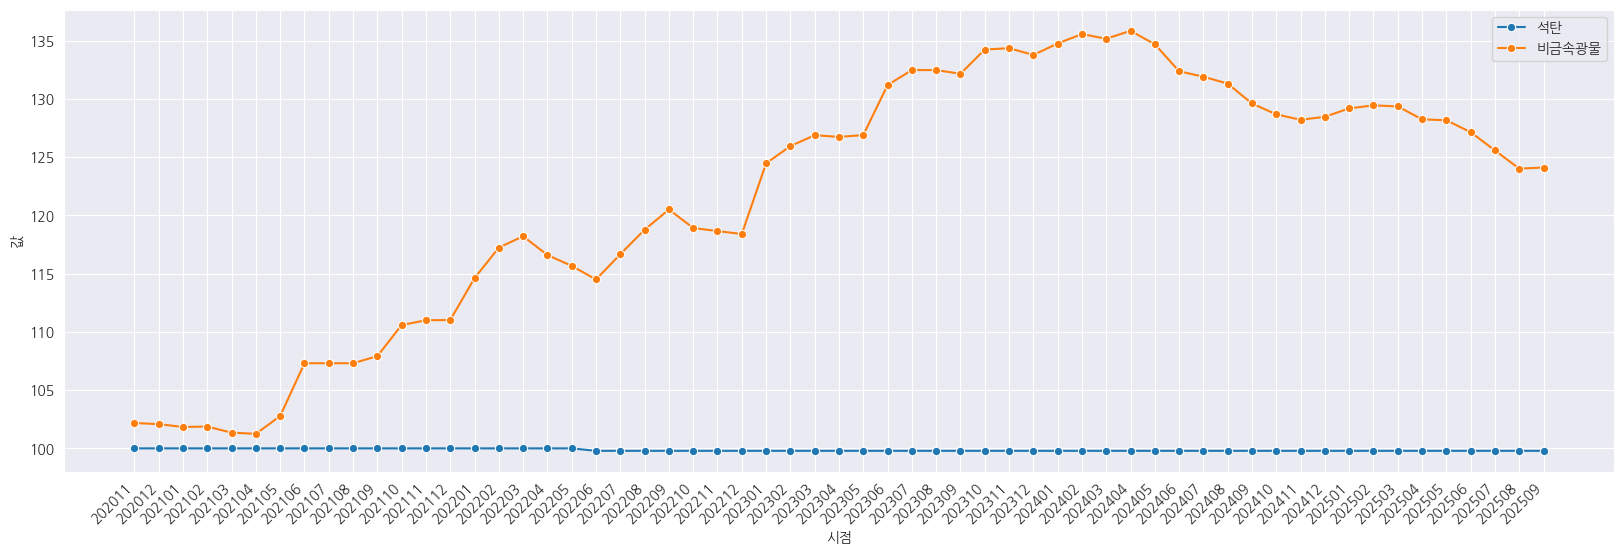

In [11]:
df_pp5 = df_pp_price[(df_pp_price['통계항목코드1'].str.startswith('2')) & (df_pp_price['통계항목코드1'].str.endswith('AA')) & (df_pp_price['통계항목코드1_길이'] == 7)]


plt.figure(figsize=(20,6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp5, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

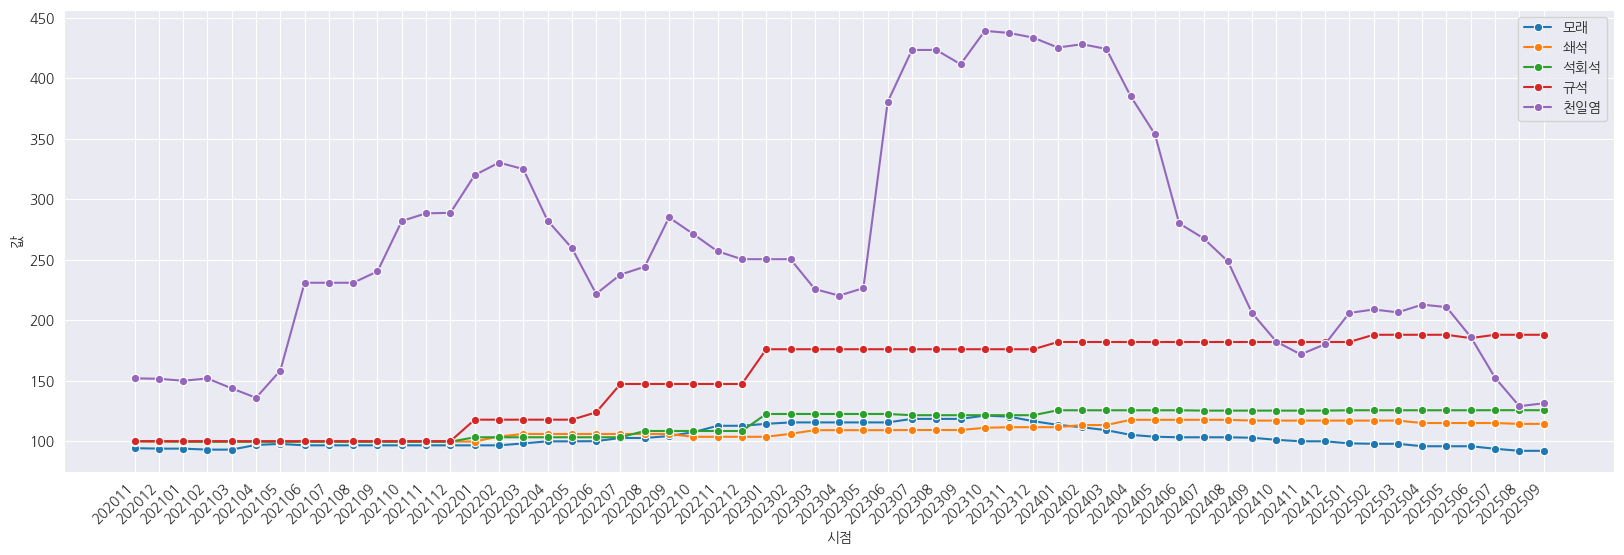

In [12]:
df_pp_dtl = api.get_statistic_search(통계표코드="404Y016", 주기="M", 검색시작일자="202011", 검색종료일자="202510")
df_pp_dtl_20122 = df_pp_dtl[(df_pp_dtl['통계항목코드1'].str.startswith('20122'))].copy()
df_pp_dtl_20122['값'] = df_pp_dtl_20122['값'].astype(float)

plt.figure(figsize=(20,6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp_dtl_20122, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

- 공산품
+ 동판 : 전기 전도율과 열전도율이 뛰어난 구리를 가공해서 만든 판 (전기전자 경기 + 2차전지 경기와 밀접하게 연동)
+ 알루미늄2차정련품 : 알루미늄은 자동차·항공·건축·전기전자 등에서 수요가 지속적으로 증가, 최근 ESG(친환경, 탄소중립) 이슈 때문에 2차 정련품 비중 확대, 유럽·일본은 이미 2차 알루미늄 비중이 높음 → 한국도 점차 확대 추세
    + 자동차 경량화 부품 (휠, 엔진 블록, 차체 프레임), 건축자재 (창호, 외벽재, 커튼월), 기계·항공 부품
+ 갈바륨강판 : 알루미늄+아연 합금 도금강판으로, 녹에 강하고 내구성이 높아 건축·자동차·가전 산업에 폭넓게 쓰이는 핵심 소재
+ 부타디엔 → 합성고무(타이어)
+ 자일렌 → 페트병, 섬유, 페인트/용제
+ 옥탄올 → PVC 가소제, 향료, 계면활성제

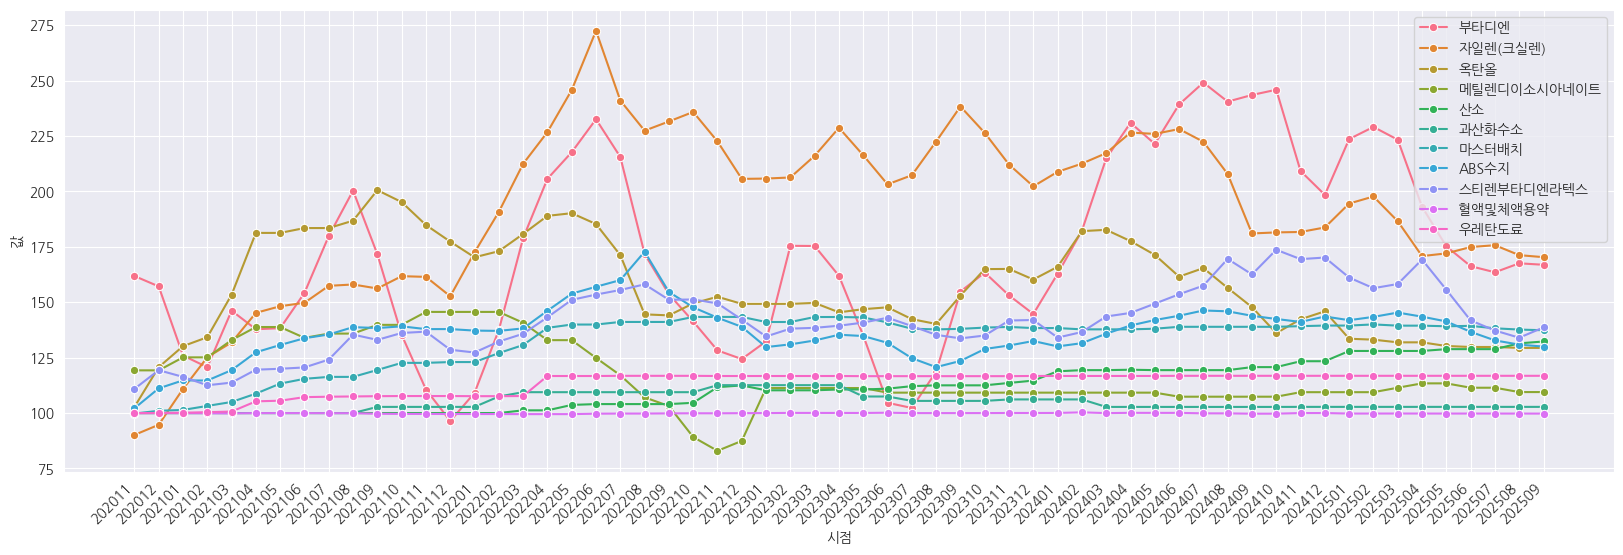

In [13]:
df_pp_dtl_20122 = df_pp_dtl[(df_pp_dtl['통계항목코드1'].str.endswith('3AA')) & (df_pp_dtl['통계항목코드1'].str.startswith('305'))].copy()
df_pp_dtl_20122['값'] = df_pp_dtl_20122['값'].astype(float)
df_pp_dtl_20122['값_ma'] = (
    df_pp_dtl_20122
    .sort_values(['통계항목명1', '시점'])      # 반드시 정렬 필요
    .groupby('통계항목명1')['값']
    .rolling(window=6, min_periods=1)  # 3개월치, 데이터 부족 시 1개월부터 계산
    .mean()
    .reset_index(level=0, drop=True)    # groupby 인덱스 제거
)

plt.figure(figsize=(20,6))  # 그림 넓게
df_pp_dtl_20122 = df_pp_dtl_20122[df_pp_dtl_20122['통계항목명1'].isin([ '부타디엔', '자일렌(크실렌)', '옥탄올', '메틸렌디이소시아네이트', '산소', '과산화수소', '마스터배치',
                                                                     'ABS수지', '스티렌부타디엔라텍스', '혈액및체액용약', '우레탄도료'])]
sns.lineplot(x="시점", y="값", data=df_pp_dtl_20122, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

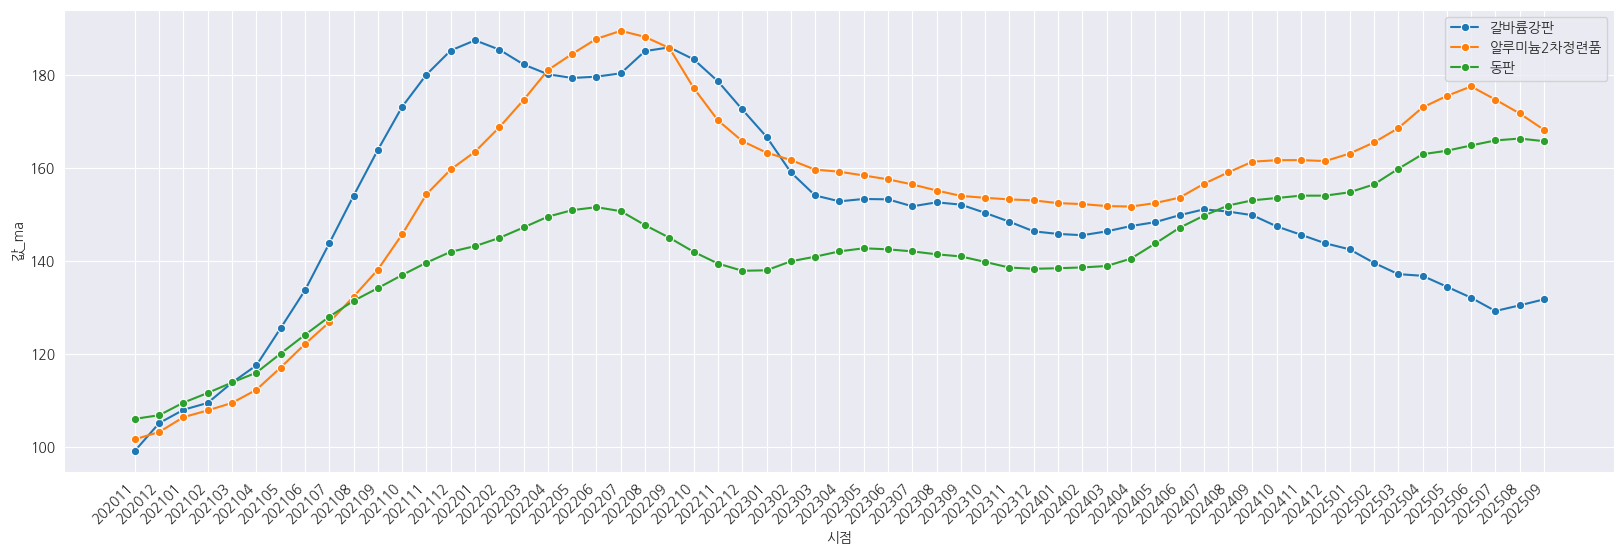

In [14]:

df_pp_dtl_20122 = df_pp_dtl[(df_pp_dtl['통계항목코드1'].str.endswith('3AA')) & (df_pp_dtl['통계항목코드1'].str.startswith('307'))].copy()
df_pp_dtl_20122['값'] = df_pp_dtl_20122['값'].astype(float)
df_pp_dtl_20122['값_ma'] = (
    df_pp_dtl_20122
    .sort_values(['통계항목명1', '시점'])      # 반드시 정렬 필요
    .groupby('통계항목명1')['값']
    .rolling(window=6, min_periods=1)  # 3개월치, 데이터 부족 시 1개월부터 계산
    .mean()
    .reset_index(level=0, drop=True)    # groupby 인덱스 제거
)
df_pp_dtl_20122 = df_pp_dtl_20122[df_pp_dtl_20122['통계항목명1'].isin([ '갈바륨강판', '동판', '알루미늄2차정련품'])]
plt.figure(figsize=(20, 6))  # 그림 넓게

sns.lineplot(x="시점", y="값_ma", data=df_pp_dtl_20122, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

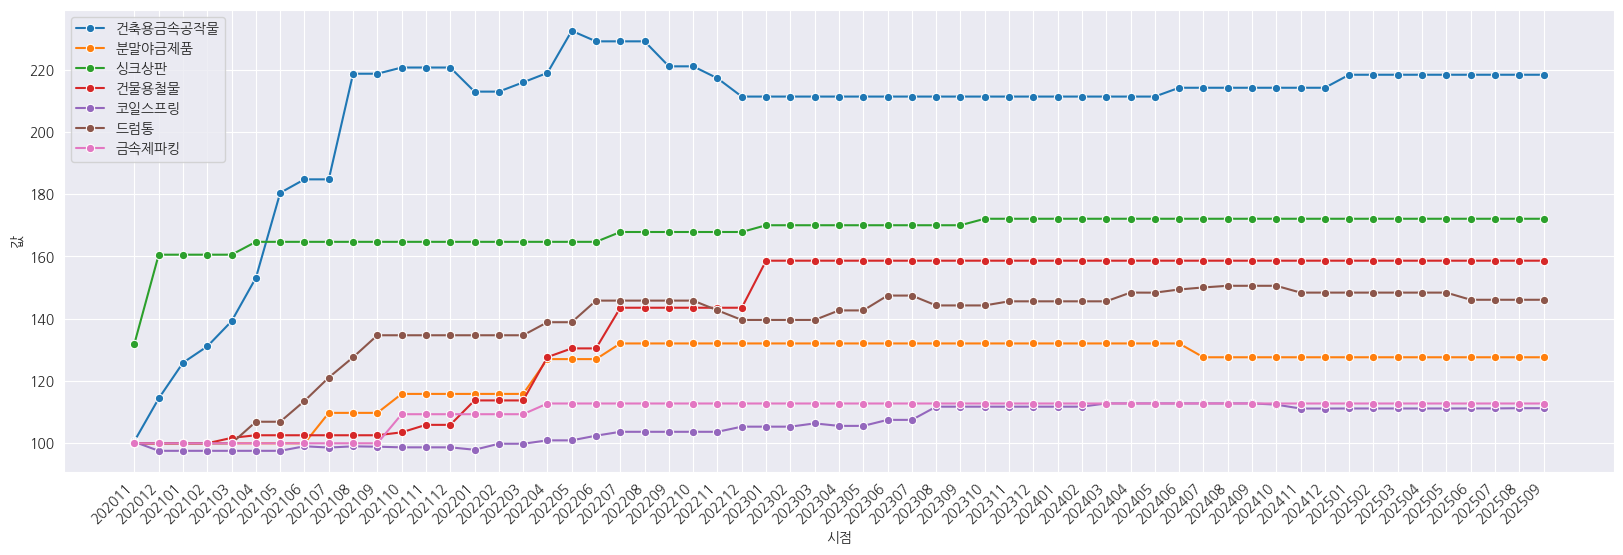

In [15]:

df_pp_dtl_20122 = df_pp_dtl[
    (df_pp_dtl['통계항목코드1'].str.endswith('3AA')) & (df_pp_dtl['통계항목코드1'].str.startswith('308'))].copy()
df_pp_dtl_20122['값'] = df_pp_dtl_20122['값'].astype(float)

plt.figure(figsize=(20, 6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp_dtl_20122, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

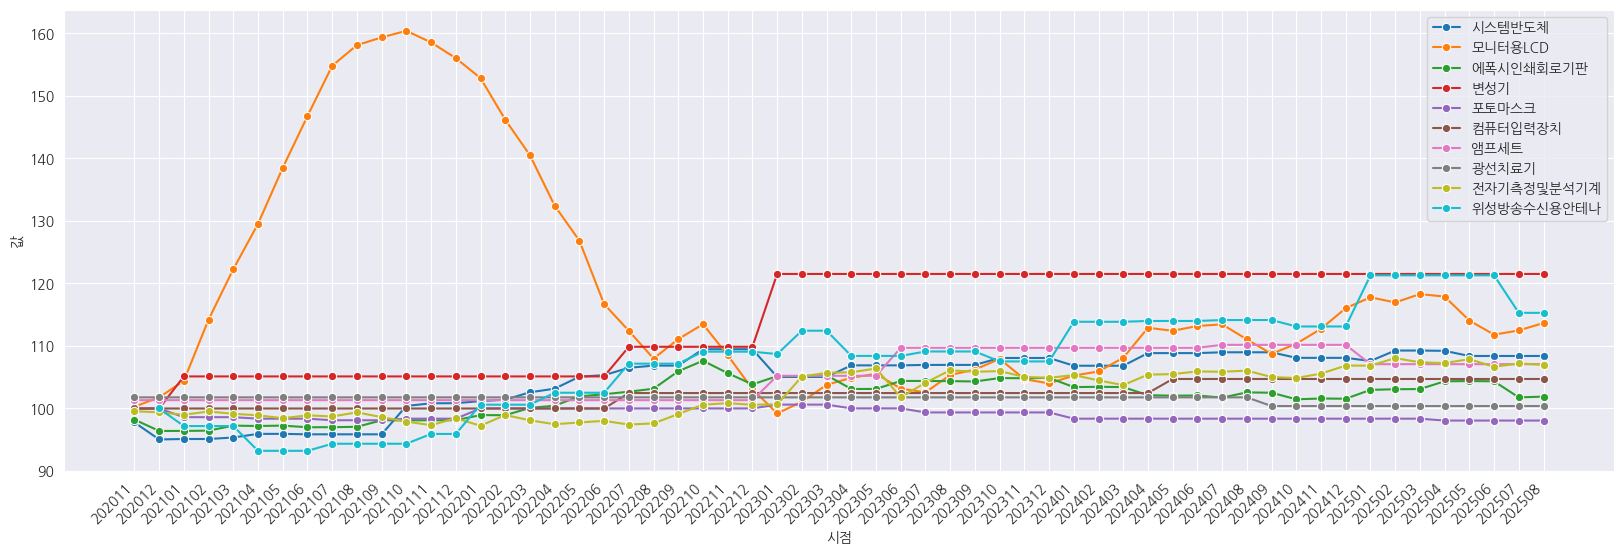

In [62]:

df_pp_dtl_20122 = df_pp_dtl[
    (df_pp_dtl['통계항목코드1'].str.endswith('3AA')) & (df_pp_dtl['통계항목코드1'].str.startswith('309'))].copy()
df_pp_dtl_20122['값'] = df_pp_dtl_20122['값'].astype(float)

plt.figure(figsize=(20, 6))  # 그림 넓게

sns.lineplot(x="시점", y="값", data=df_pp_dtl_20122, hue='통계항목명1', marker='o')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()